In [40]:
import pandas as pd
import numpy as np
import pymc as pm
from quap import quap
import arviz as az
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv('test.csv')
data = data.dropna()
data = data.sample(n=1000)

In [41]:
column_names = data.columns
column_names

Index(['Id', 'Address', 'Summary', 'Type', 'Year built', 'Heating', 'Cooling',
       'Parking', 'Lot', 'Bedrooms', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'Middle School', 'Middle School Score',
       'Middle School Distance', 'High School', 'High School Score',
       'High School Distance', 'Flooring', 'Heating features',
       'Cooling features', 'Appliances included', 'Laundry features',
       'Parking features', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Last Sold On', 'Last Sold Price', 'City',
       'Zip', 'State'],
      dtype='object')

In [42]:
data

,Id,Address,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,...,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
30334,77773,3461 Brandon St,"Welcome to 3461 Brandon St., your mid-century ...",SingleFamily,1956.0,Central,Central Air,"Concrete, Garage - Single Door",4994.0,3,...,"Concrete, Garage - Single Door",726925.0,7971.0,2021-01-14,799000.0,2017-05-11,685000.0,Pasadena,91107,CA
24264,71703,7631 Isla St,Beautiful Single story with Huge open floor pl...,SingleFamily,2004.0,Central,Central Air,Garage - Attached,6970.0,3,...,Garage - Attached,263742.0,3996.0,2020-12-11,359900.0,2014-09-03,240000.0,Hemet,92545,CA
21111,68550,10268 Sully Way,This is your opportunity to own an upgraded tu...,SingleFamily,1973.0,Central,Central Air,"Driveway, Garage",6500.0,3,...,"Driveway, Garage",547312.0,6657.0,2021-01-13,749900.0,2019-10-22,635000.0,San Diego,92145,CA
29995,77434,2 Silvermaple,Gorgeous upscale home situated in the gated co...,SingleFamily,2000.0,Central,Central Air,"Direct Access, Garage, Garage Faces Front, Gar...",1750.0,3,...,"Direct Access, Garage, Garage Faces Front, Gar...",773620.0,8849.0,2021-02-13,889000.0,2016-12-13,729000.0,Irvine,92618,CA
25839,73278,29650 Saint Andrews Ct,"Welcome to Saint Andrews, A turn key, one leve...",SingleFamily,1988.0,Central,Central Air,"Driveway, Garage",4792.0,3,...,"Driveway, Garage",323666.0,3883.0,2020-12-29,414000.0,2016-10-27,305000.0,Murrieta,92563,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5585,53024,3424 Orinda Cir,Don't miss this adorable home in the heart of ...,SingleFamily,1971.0,Central,Central Air,"Garage - Attached, Covered",6098.0,3,...,"Garage - Attached, Covered",289006.0,3248.0,2020-12-07,370000.0,2020-07-06,365000.0,Shingle Springs,95682,CA
16281,63720,3193 Fair Oaks Ave,Behind a tall plastered wall sits an updated 4...,SingleFamily,1941.0,Central,Central Air,Driveway,10454.0,5,...,Driveway,605277.0,6835.0,2020-11-05,1198000.0,2013-09-26,540000.0,Altadena,91001,CA
27975,75414,5074 Seri Ct,Beautiful 2 story home located on a quiet cul ...,SingleFamily,2002.0,Central,Central Air,"Driveway, Garage - Two Door, RV Potential",7841.0,4,...,"Driveway, Garage - Two Door, RV Potential",286765.0,3228.0,2021-01-28,510000.0,2002-11-06,185500.0,Jurupa Valley,92509,CA
25340,72779,31211 Via Solana,This is a must see property. Home is located i...,SingleFamily,1976.0,"Central, Zoned, Forced Air, Electric, Natural ...","Central Air, Dual, Zoned, Electric, Gas, High ...","Driveway, Concrete, Driveway Up Slope From Str...",7524.0,4,...,"Driveway, Concrete, Driveway Up Slope From Str...",541064.0,5533.0,2021-01-23,1170000.0,2000-03-16,385000.0,San Juan Capistrano,92675,CA


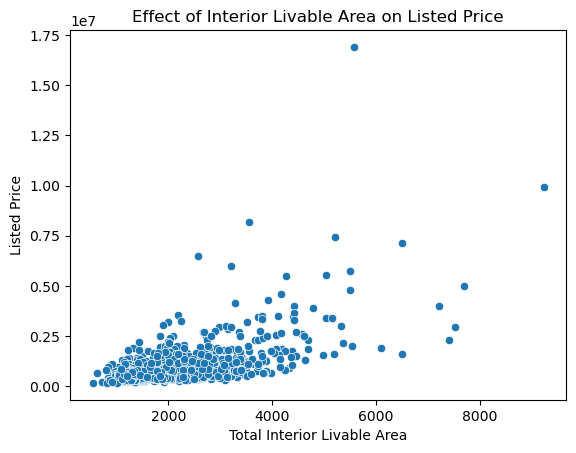

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Total interior livable area', y='Listed Price', data=data)
plt.xlabel('Total Interior Livable Area')
plt.ylabel('Listed Price')
plt.title('Effect of Interior Livable Area on Listed Price')
plt.show()

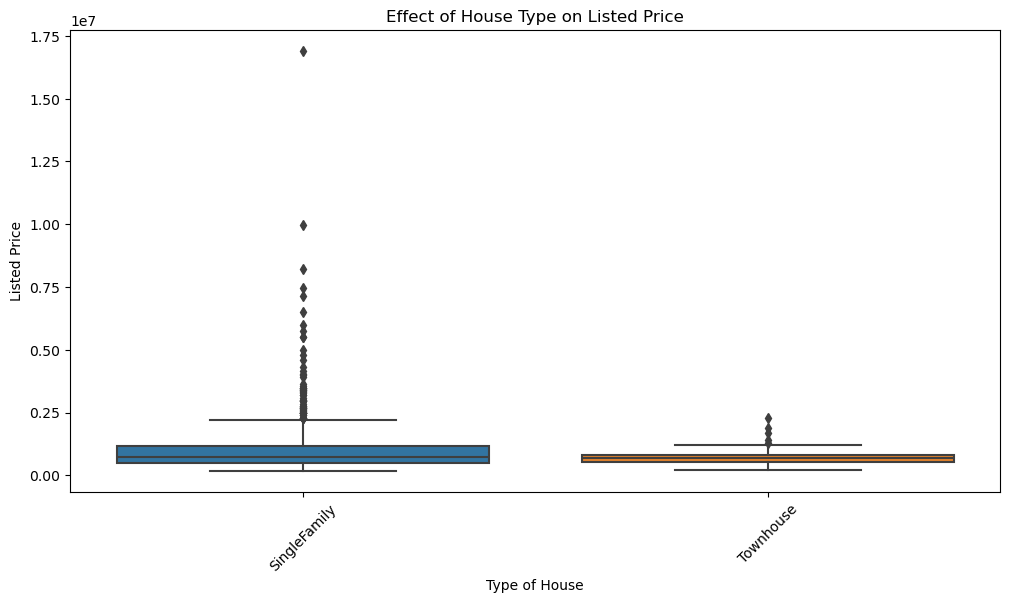

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Listed Price', data=data)
plt.xlabel('Type of House')
plt.ylabel('Listed Price')
plt.title('Effect of House Type on Listed Price')
plt.xticks(rotation=45) 
plt.show()

## Feature Selection

In [45]:
import pandas as pd

numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

correlation_with_price = correlation_matrix['Listed Price'].sort_values(ascending=False)

In [46]:
correlation_with_price

Listed Price                   1.000000
Tax assessed value             0.901776
Annual tax amount              0.896985
Last Sold Price                0.810697
Total interior livable area    0.579188
Bathrooms                      0.550641
Full bathrooms                 0.488030
Elementary School Score        0.305914
Middle School Score            0.269642
High School Score              0.256552
Total spaces                   0.022916
Garage spaces                  0.021488
Year built                     0.001718
Elementary School Distance     0.000403
Lot                           -0.012313
High School Distance          -0.019166
Middle School Distance        -0.023696
Id                            -0.023994
Zip                           -0.256588
Name: Listed Price, dtype: float64

In [49]:
columns_to_keep = [
    'Listed Price', 'Last Sold Price',
    'Bathrooms', 'Total interior livable area', 
    'Elementary School Score',
    'Garage spaces', 'Total spaces', 'Type', 'Heating', 'Cooling', 'Region', 'City'
]

filtered_data = data[columns_to_keep]

In [50]:
filtered_data

,Listed Price,Last Sold Price,Bathrooms,Total interior livable area,Elementary School Score,Garage spaces,Total spaces,Type,Heating,Cooling,Region,City
30334,799000.0,685000.0,2.0,1672.0,5.0,1.0,1.0,SingleFamily,Central,Central Air,Pasadena,Pasadena
24264,359900.0,240000.0,2.0,2248.0,6.0,2.0,2.0,SingleFamily,Central,Central Air,Hemet,Hemet
21111,749900.0,635000.0,2.0,1073.0,7.0,2.0,2.0,SingleFamily,Central,Central Air,San Diego,San Diego
29995,889000.0,729000.0,3.0,1750.0,7.0,2.0,2.0,SingleFamily,Central,Central Air,Irvine,Irvine
25839,414000.0,305000.0,2.0,1143.0,6.0,2.0,2.0,SingleFamily,Central,Central Air,Murrieta,Murrieta
...,...,...,...,...,...,...,...,...,...,...,...,...
5585,370000.0,365000.0,3.0,1873.0,5.0,2.0,2.0,SingleFamily,Central,Central Air,Shingle Springs,Shingle Springs
16281,1198000.0,540000.0,3.0,2004.0,2.0,2.0,2.0,SingleFamily,Central,Central Air,Altadena,Altadena
27975,510000.0,185500.0,3.0,1839.0,4.0,2.0,2.0,SingleFamily,Central,Central Air,Jurupa Valley,Jurupa Valley
25340,1170000.0,385000.0,3.0,2678.0,5.0,3.0,3.0,SingleFamily,"Central, Zoned, Forced Air, Electric, Natural ...","Central Air, Dual, Zoned, Electric, Gas, High ...",San Juan Capistrano,San Juan Capistrano


In [56]:
import pandas as pd
import numpy as np
import pymc as pm
# from sklearn.preprocessing import OneHotEncoder

features = [
    'Last Sold Price', 'Bathrooms', 'Total interior livable area', 
    'Elementary School Score', 'Garage spaces', 'Total spaces',
    'Type', 'Heating', 'Cooling', 'Region', 'City'
]
continuous_features = ['Last Sold Price', 'Bathrooms', 'Total interior livable area', 
                       'Elementary School Score', 'Garage spaces', 'Total spaces']

X = pd.DataFrame(data, columns=continuous_features)

for col in continuous_features:
    X[col] = (X[col] - X[col].mean()) / X[col].std()

Y = data['Listed Price']

In [68]:
with pm.Model() as model:
    beta = pm.Normal('beta', mu=0, sigma=10, shape=len(X.columns))
    sigma_y = pm.HalfNormal('sigma_y', sigma=10)

    mu = pm.math.dot(X, beta)

    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma_y, observed=Y)

    trace = pm.sample(500, idata_kwargs={"log_likelihood": True}, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, sigma_y]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],182.273,10.129,163.601,200.560,0.296,0.210,1174.0,817.0,1.00
beta[1],123.364,9.628,105.339,141.862,0.260,0.184,1380.0,807.0,1.00
beta[2],130.601,9.843,111.737,148.205,0.263,0.190,1384.0,743.0,1.00
beta[3],68.609,10.462,50.091,88.337,0.298,0.211,1214.0,744.0,1.00
beta[4],5.075,10.354,-12.732,26.282,0.256,0.265,1644.0,795.0,1.00
beta[5],5.011,9.989,-14.330,23.334,0.273,0.275,1332.0,851.0,1.00
sigma_y,21192.954,4.860,21183.010,21201.277,0.125,0.089,1511.0,818.0,1.01


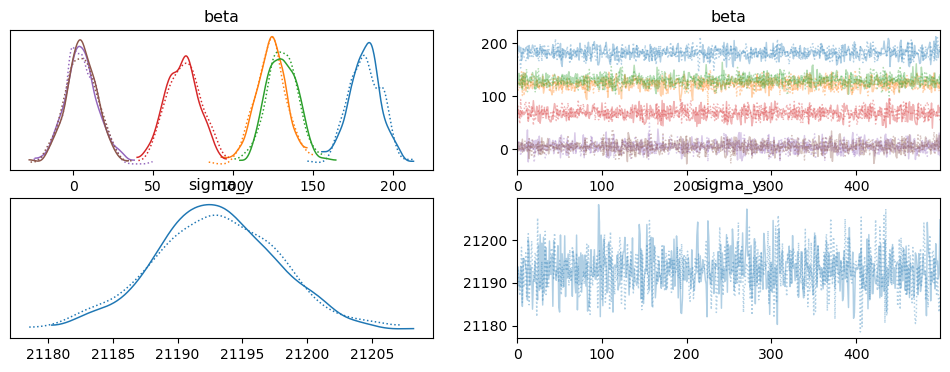

In [69]:
pm.plot_trace(trace)
pm.summary(trace)

array([[<Axes: title={'center': 'beta\n0'}>,
        <Axes: title={'center': 'beta\n1'}>,
        <Axes: title={'center': 'beta\n2'}>],
       [<Axes: title={'center': 'beta\n3'}>,
        <Axes: title={'center': 'beta\n4'}>,
        <Axes: title={'center': 'beta\n5'}>],
       [<Axes: title={'center': 'sigma_y'}>, <Axes: >, <Axes: >]],
      dtype=object)

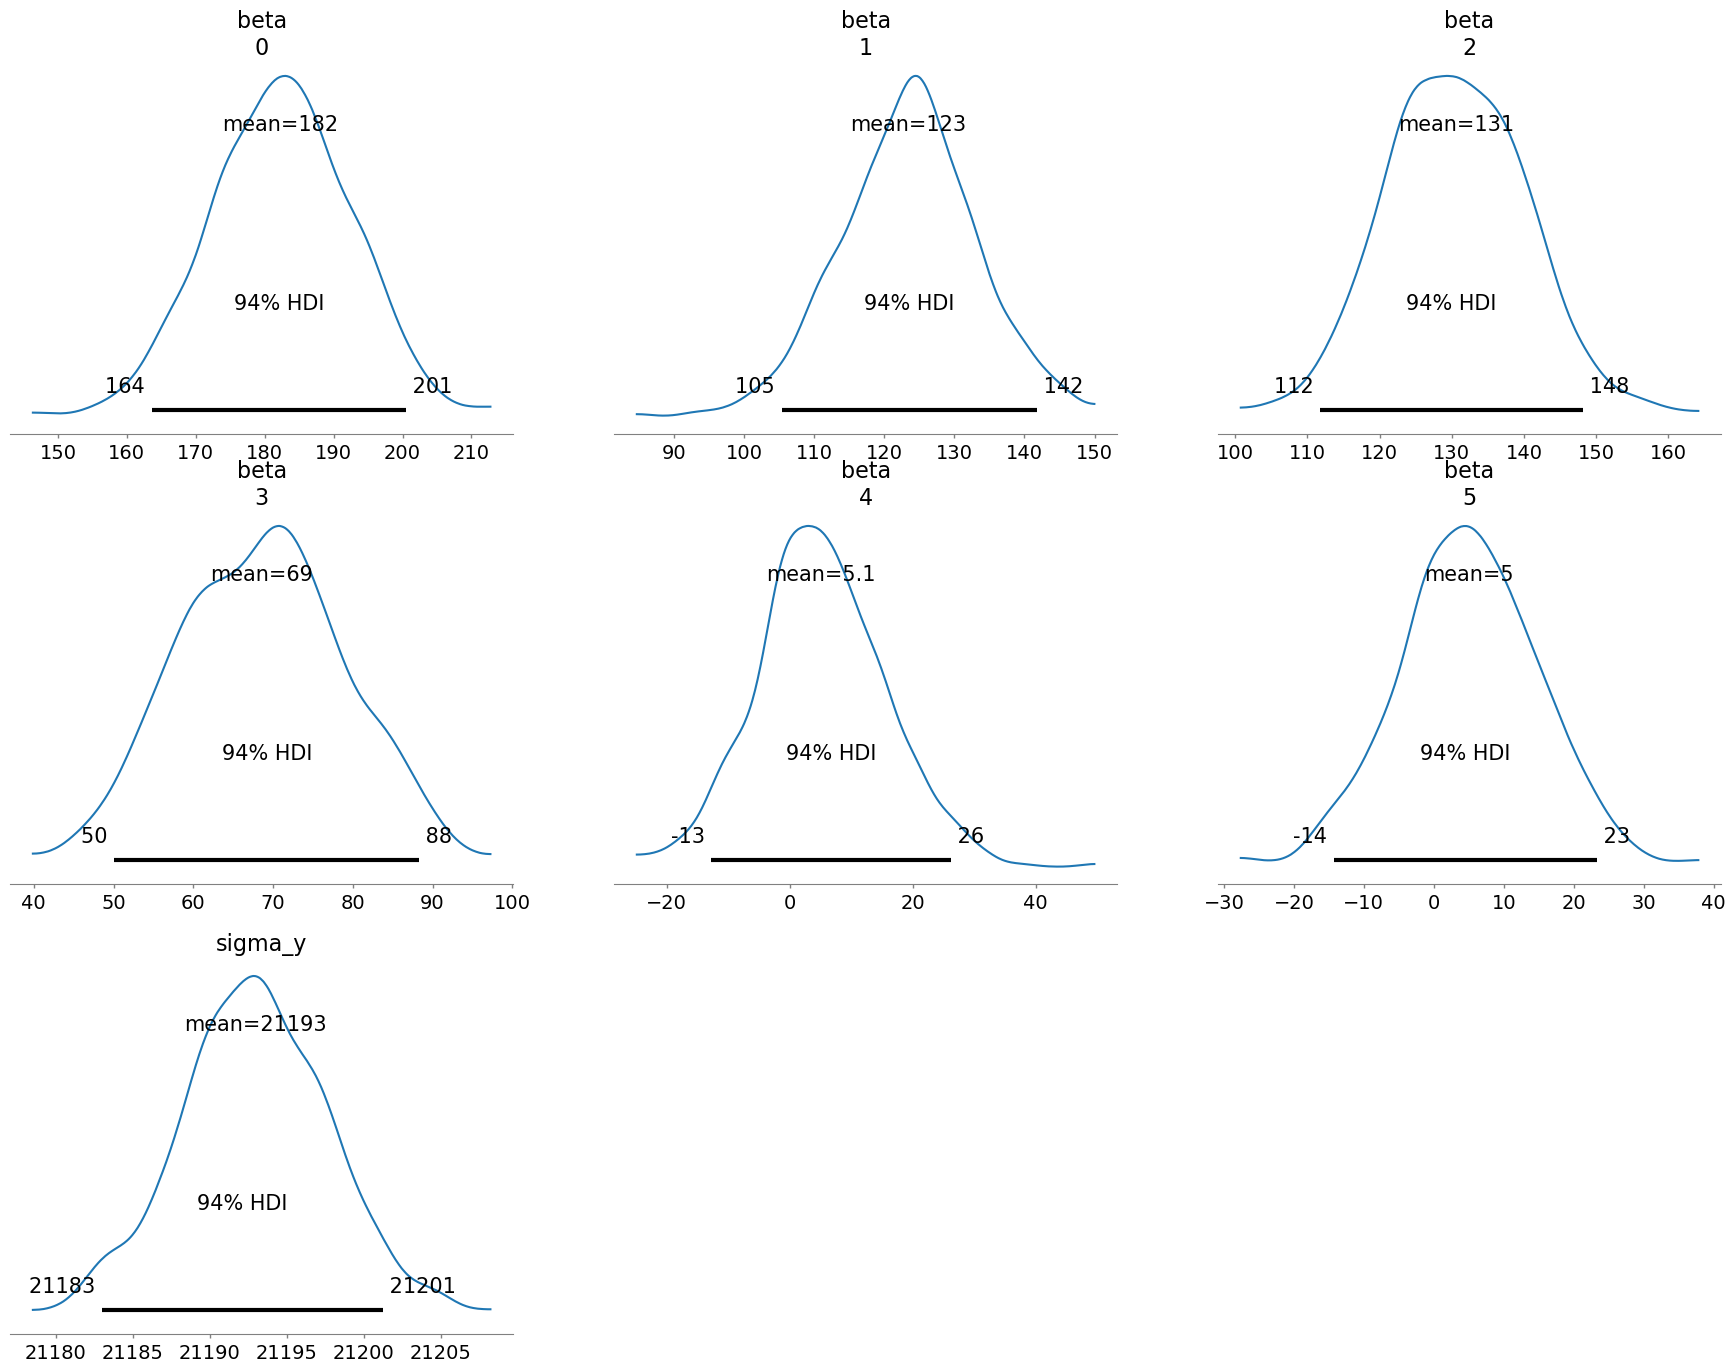

In [70]:
az.plot_posterior(trace)